# 1.1 Tensor 1D


Tensor dtype, size

In [2]:
import torch 
# int type
a = torch.tensor([7,4,3,2,6])
a.dtype

torch.int64

In [3]:
a.type()

'torch.LongTensor'

In [8]:
# int
a = torch.tensor([0.0, 1.0, 2.0, 3.0], dtype=torch.int32)
a.dtype

torch.int32

In [4]:
# float type
a = torch.tensor([0.0, 1.0, 2.0, 3.0])
a.dtype

torch.float32

In [5]:
a.type()

'torch.FloatTensor'

In [11]:
a = torch.FloatTensor([0,1,2,3,4])
a.type()

'torch.FloatTensor'

In [12]:
a = torch.tensor([0,1,2,3,4])
a = a.type(torch.FloatTensor)
a.type()

'torch.FloatTensor'

In [13]:
a.size()

torch.Size([5])

In [14]:
a.ndimension()

1

In [15]:
# view method : change size of the tensor
a_col = a.view(5,1)
a_col.size()

torch.Size([5, 1])

In [16]:
a_col = a.view(-1,1)
a_col.size()

torch.Size([5, 1])

Numpy Array, List, Torch Tensor

In [19]:
import numpy as np
# numpy array -> torch tensor
numpy_array = np.array([0.0, 1.0, 2.0, 3.0])
torch_tensor = torch.from_numpy(numpy_array)
torch_tensor

tensor([0., 1., 2., 3.], dtype=torch.float64)

In [21]:
# torch tensor -> numpy array
back_to_numpy = torch_tensor.numpy()
back_to_numpy

array([0., 1., 2., 3.])

In [26]:
to_list = torch_tensor.tolist()
to_list

[0.0, 1.0, 2.0, 3.0]

Check Tensor Value

In [22]:
new_tensor = torch.tensor([5,2,6,1])
new_tensor[0]

tensor(5)

In [23]:
new_tensor[0].item()

5

Slicing

In [27]:
c = torch.tensor([100, 1, 2, 3 ,0])
c

tensor([100,   1,   2,   3,   0])

In [28]:
c[1:3]

tensor([1, 2])

Basic Operations : addiction, subtraction, multiplication, Product

In [29]:
# elemental-wise addiction
u = torch.tensor([1.0, 0.0])
v = torch.tensor([0.0, 1.0])

z = u + v
z

tensor([1., 1.])

In [31]:
# elemental-wise multiplication
y = torch.tensor([1,2])
z = 2*y
z

tensor([2, 4])

In [32]:
# Broadcasting : 자동으로 벡터 사이즈 맞추어서 연산
u = torch.tensor([1, 2, 3, -1])
v = u + 1
v

tensor([2, 3, 4, 0])

In [33]:
# Product of two Tensors
u = torch.tensor([1,2])
v = torch.tensor([3,2])
z = u*v
z

tensor([3, 4])

In [34]:
# 내적 : Dot Product of two Tensors
u = torch.tensor([1,2])
v = torch.tensor([3,2])
z = torch.dot(u,v)
z

tensor(7)

In [38]:
# Universal Functions
a = torch.tensor([1,-1,1,-3], dtype=torch.float)
mean_a = a.mean()
mean_a

tensor(-0.5000)

In [39]:
a = torch.tensor([1,-1,1,-3], dtype=torch.float)
max_a = a.max()
max_a

tensor(1.)

In [40]:
np.pi

3.141592653589793

In [41]:
x = torch.tensor([0, np.pi/2, np.pi])
y = torch.sin(x)
y

tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])

In [42]:
# linspace : start, end를 포함하여 균등한 간격의 값이 담긴 Torch 생성
torch.linspace(-2,2,steps=5)

tensor([-2., -1.,  0.,  1.,  2.])

# 1.2 Two-Dimensional Tensors

In [45]:
a = torch.tensor([[11,12,13], [21,22,23], [31,32,33]])
a

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])

In [46]:
# Tensor 차원 개수
a.ndimension()

2

In [47]:
# Tensor 형태
a.shape

torch.Size([3, 3])

In [48]:
# 원소의 총 개수
a.numel()

9

In [50]:
# 원소 불러오기 : 행, 열 순서
a[1][2]

tensor(23)

In [51]:
# 특정 구간 원소 불러오기
a[1][0:2]

tensor([21, 22])

In [53]:
# 더하기
X = torch.tensor([[1,0], [0,1]])
Y = torch.tensor([[2,1], [1,2]])
Z = X+Y
Z

tensor([[3, 1],
        [1, 3]])

In [55]:
# 곱하기 w/ Broadcasting
Z = 2 *Y
Z

tensor([[4, 2],
        [2, 4]])

In [57]:
# Elemental-wise 곱
Z = X*Y
Z

tensor([[2, 0],
        [0, 2]])

In [59]:
# Tensor 곱
Z = torch.mm(X,Y)
Z

tensor([[2, 1],
        [1, 2]])

In [61]:
A_2 = torch.tensor([[0,1,1], [1,0,1]])
B_2 = torch.tensor([[1,1], [1,1], [-1,1]])
C = torch.mm(A_2,B_2)
C

tensor([[0, 2],
        [0, 2]])

# 1.3 Differentiation in Pytorch

In [63]:
# Derivatives
x = torch.tensor(2, dtype=torch.float, requires_grad=True)
y = x**2    # 함수 정의
y.backward()  # gradient 계산
x.grad

tensor(4.)

In [69]:
# Partial Derivatives
u = torch.tensor(1, dtype=torch.float, requires_grad=True)
v = torch.tensor(2, dtype=torch.float, requires_grad=True)
f = u*v + u**2
f

tensor(3., grad_fn=<AddBackward0>)

In [70]:
f.backward()
u.grad

tensor(4.)

In [71]:
v.grad

tensor(1.)

# 1.4 Simple Dataset

In [74]:
# Construct Dataset
from torch.utils.data import Dataset

class toy_set(Dataset):
  def __init__(self, length=100, transform=None):
    self.x = 2*torch.ones(length, 2)
    self.y = torch.ones(length, 1)
    self.len = length
    self.transform = transform
  
  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    return self.len

In [77]:
dataset=toy_set()
len(dataset)

100

In [78]:
dataset[0]

(tensor([2., 2.]), tensor([1.]))

In [79]:
# Transforms
class add_mult(object):
  def __init__(self, addx=1, muly=1):
    self.addx = addx
    self.muly = muly

  def __call__(self, sample):
    x = sample[0]
    y = sample[1]
    x = x+self.addx
    y = y*self.muly

    sample = x, y
    return sample

In [80]:
toy_transform = add_mult()
dataset = toy_set(transform=toy_transform)

In [81]:
dataset[0]

(tensor([3., 3.]), tensor([1.]))

In [82]:
# Transforms Compose : 여러개의 Transfrom들을 순차적으로 사용
class mult(object):
  def __init__(self,mul=100):
    self.mul = mul

  def __call__(self, sample):
    x = sample[0]
    y = sample[1]
    x = x * self.mul
    y = y * self.mul
    sample = x, y
    return sample

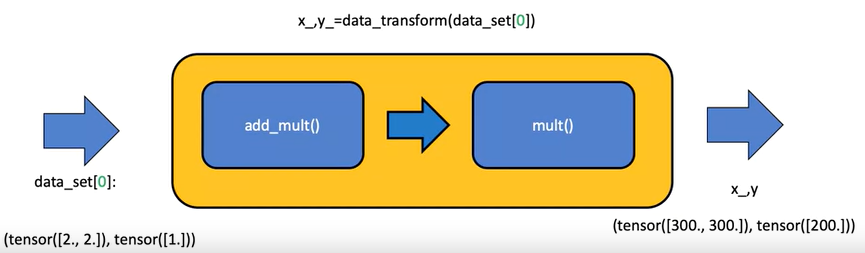

In [83]:
from torchvision import transforms
data_transform = transforms.Compose([add_mult(), mult()])

In [84]:
dataset_tr = toy_set(transform=data_transform)
dataset_tr[0]

(tensor([300., 300.]), tensor([100.]))

# 1.5 Dataset

In [85]:
# Dataset class
from PIL import Image
import pandas as pd
import os
from matplotlib.pyplot import imshow
from torch.utils.data import Dataset, DataLoader

In [87]:
directory = '/resources/data'
csv_file = 'index.csv'
csv_path = os.path.join(directory, csv_file)

data_name = pd.read_csv(csv_path)
data_name.head()

FileNotFoundError: ignored

In [86]:
import torchvision.datasets as dsets
from torchvision import transforms
dataset = dsets.MNIST(root='./data', train=False, download=True, transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

